# Objetivo

La empresa de productos alimenticios en la cual trabajamos nos pidio realizar una investigacion del comportamiento de los usuarios para ello realizaremos

-Preparar los datos

-Realizar analisis exploratorio

-Estudio del embudo de ventas

-Una prueba A/A/B (el cual consiste en 2 grupos de controlo y 1 de prueba)

## 1 Abrir archivo

In [1]:
import datetime as dt
import math as mth

import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

In [3]:
print(df_data)

                      EventName         DeviceIDHash  EventTimestamp  ExpId
0              MainScreenAppear  4575588528974610257      1564029816    246
1              MainScreenAppear  7416695313311560658      1564053102    246
2       PaymentScreenSuccessful  3518123091307005509      1564054127    248
3              CartScreenAppear  3518123091307005509      1564054127    248
4       PaymentScreenSuccessful  6217807653094995999      1564055322    248
...                         ...                  ...             ...    ...
244121         MainScreenAppear  4599628364049201812      1565212345    247
244122         MainScreenAppear  5849806612437486590      1565212439    246
244123         MainScreenAppear  5746969938801999050      1565212483    246
244124         MainScreenAppear  5746969938801999050      1565212498    246
244125       OffersScreenAppear  5746969938801999050      1565212517    246

[244126 rows x 4 columns]


## 2 Preparar datos apara analisis


In [4]:
df_data.columns = ['event','device','time','expid']

In [5]:
print(df_data)

                          event               device        time  expid
0              MainScreenAppear  4575588528974610257  1564029816    246
1              MainScreenAppear  7416695313311560658  1564053102    246
2       PaymentScreenSuccessful  3518123091307005509  1564054127    248
3              CartScreenAppear  3518123091307005509  1564054127    248
4       PaymentScreenSuccessful  6217807653094995999  1564055322    248
...                         ...                  ...         ...    ...
244121         MainScreenAppear  4599628364049201812  1565212345    247
244122         MainScreenAppear  5849806612437486590  1565212439    246
244123         MainScreenAppear  5746969938801999050  1565212483    246
244124         MainScreenAppear  5746969938801999050  1565212498    246
244125       OffersScreenAppear  5746969938801999050  1565212517    246

[244126 rows x 4 columns]


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   event   244126 non-null  object
 1   device  244126 non-null  int64 
 2   time    244126 non-null  int64 
 3   expid   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [7]:
print(df_data.isna().sum())

event     0
device    0
time      0
expid     0
dtype: int64


In [8]:
print(df_data.duplicated().sum())

413


In [9]:
df_data.drop_duplicates(inplace=True)

In [10]:
print(df_data.duplicated().sum())

df_data.reset_index(drop=True ,inplace=True)


0


In [11]:
print(df_data)

                          event               device        time  expid
0              MainScreenAppear  4575588528974610257  1564029816    246
1              MainScreenAppear  7416695313311560658  1564053102    246
2       PaymentScreenSuccessful  3518123091307005509  1564054127    248
3              CartScreenAppear  3518123091307005509  1564054127    248
4       PaymentScreenSuccessful  6217807653094995999  1564055322    248
...                         ...                  ...         ...    ...
243708         MainScreenAppear  4599628364049201812  1565212345    247
243709         MainScreenAppear  5849806612437486590  1565212439    246
243710         MainScreenAppear  5746969938801999050  1565212483    246
243711         MainScreenAppear  5746969938801999050  1565212498    246
243712       OffersScreenAppear  5746969938801999050  1565212517    246

[243713 rows x 4 columns]


In [12]:
df_data['datetime'] = pd.to_datetime(df_data['time'], unit='s')
df_data['date'] = pd.to_datetime(df_data['datetime'].dt.date)

In [13]:
print(df_data)

                          event               device        time  expid  \
0              MainScreenAppear  4575588528974610257  1564029816    246   
1              MainScreenAppear  7416695313311560658  1564053102    246   
2       PaymentScreenSuccessful  3518123091307005509  1564054127    248   
3              CartScreenAppear  3518123091307005509  1564054127    248   
4       PaymentScreenSuccessful  6217807653094995999  1564055322    248   
...                         ...                  ...         ...    ...   
243708         MainScreenAppear  4599628364049201812  1565212345    247   
243709         MainScreenAppear  5849806612437486590  1565212439    246   
243710         MainScreenAppear  5746969938801999050  1565212483    246   
243711         MainScreenAppear  5746969938801999050  1565212498    246   
243712       OffersScreenAppear  5746969938801999050  1565212517    246   

                  datetime       date  
0      2019-07-25 04:43:36 2019-07-25  
1      2019-07-25 1

-El dataframe df_data cuenta con 4 columnas inicialmente y 244126 registros

-Las 4 columnas son non-nul y cuentan con la totalidad e los registros

-Los tipos de datos son correctos solo conciderar que la columna time esta con un formato de timestamp el cual se tiene que transformar a date para un mejor analisis lo cual se realizo

-Se encontraron 413 registros totalmente duplicados por se procedio a eliminarlos

-Se agrego como se comento una columna correspondiendo a la fecha y hora del evento y la fecha solamente en base a la columna time

## Estudiar y comprobar datos

In [14]:

event_count = df_data.groupby('event').agg({'device': 'count'}).rename(columns={'device':'eventcount'})
print(event_count)

                         eventcount
event                              
CartScreenAppear              42668
MainScreenAppear             119101
OffersScreenAppear            46808
PaymentScreenSuccessful       34118
Tutorial                       1018


In [15]:
user_count = df_data.groupby('event').agg({'device':'nunique'}).rename(columns={'device':'usercount'})
print(user_count)

                         usercount
event                             
CartScreenAppear              3749
MainScreenAppear              7439
OffersScreenAppear            4613
PaymentScreenSuccessful       3547
Tutorial                       847


In [16]:
average_event_user = event_count.merge(user_count, on='event')
average_event_user['average'] = average_event_user['eventcount']/average_event_user['usercount']
print(average_event_user)


                         eventcount  usercount    average
event                                                    
CartScreenAppear              42668       3749  11.381168
MainScreenAppear             119101       7439  16.010351
OffersScreenAppear            46808       4613  10.146976
PaymentScreenSuccessful       34118       3547   9.618833
Tutorial                       1018        847   1.201889


-event_count cuenta la cantidad de eventos que se realizaron 

-user_count cuenta la cantidad e usuarios unicos que realizaron un  evento

-average_event_user es un merge entre event_count y user_count en la cual se agrego el promedio (event_count/user_count)

-En promedio hay 11 personas que visitan CartScreenAppear , 16 que visitan MainScreenAppear, 10 que visitan OffersScreenAppear, 10 que visitan PaymentScreenSuccessful y 1 que visitan Tutorial 

-Con respecto a los promedios la mayoria es obviamente los de la la pagina principal ya que este es el punto de contacto, disminuye con respecto a ver las ofertas, el carro, el pago como tal y practicamente nadie ve el tutorial  

In [17]:
print(df_data['date'].min())
print(df_data['date'].max())
print(df_data['date'].max() -df_data['date'].min() )

2019-07-25 00:00:00
2019-08-07 00:00:00
13 days 00:00:00


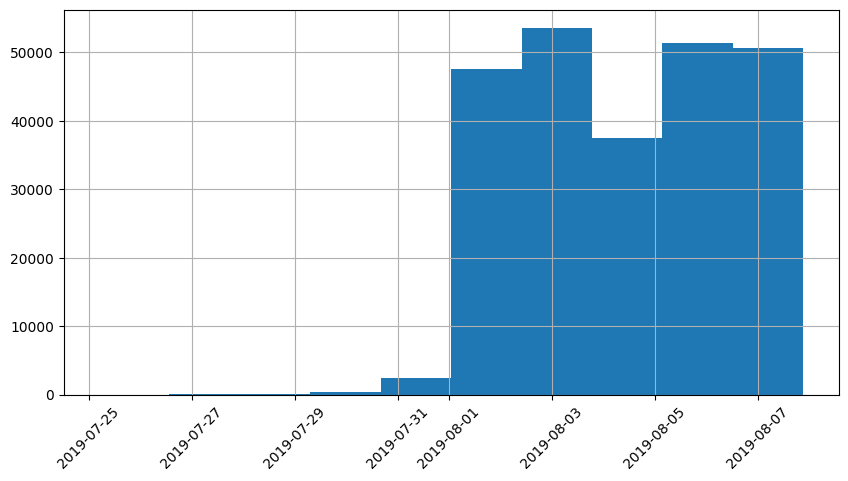

In [18]:
plt.figure(figsize=(10,5))
df_data['datetime'].hist()
plt.xticks(rotation=45)
plt.show()

In [19]:
df_new_data = df_data[df_data['datetime'] >= '2019-08-01']
print(df_new_data)
print(df_new_data['expid'].value_counts())

                     event               device        time  expid  \
2826              Tutorial  3737462046622621720  1564618048    246   
2827      MainScreenAppear  3737462046622621720  1564618080    246   
2828      MainScreenAppear  3737462046622621720  1564618135    246   
2829    OffersScreenAppear  3737462046622621720  1564618138    246   
2830      MainScreenAppear  1433840883824088890  1564618139    247   
...                    ...                  ...         ...    ...   
243708    MainScreenAppear  4599628364049201812  1565212345    247   
243709    MainScreenAppear  5849806612437486590  1565212439    246   
243710    MainScreenAppear  5746969938801999050  1565212483    246   
243711    MainScreenAppear  5746969938801999050  1565212498    246   
243712  OffersScreenAppear  5746969938801999050  1565212517    246   

                  datetime       date  
2826   2019-08-01 00:07:28 2019-08-01  
2827   2019-08-01 00:08:00 2019-08-01  
2828   2019-08-01 00:08:55 2019-08-01  

-El periodo de prueba es bastante corto des finales de Julia hasta los primeros dias de Agosto alrededor de 13 dias

-Comprobando la frecuencia de las fechas solo se tienen datos significativos a partir del 1 de Agosto del 2019

-Teniendo en cuenta lo anterior se filtro a partir de esta fecha para que sean mas relavante el analisis

-Se verifico que el nuevo dataframe cuenta con 240887 en comparacion al viejo con 243713 por lo cual solo se descartaron 2826 registros

-Se verifico que estuvieran los 3 tipos de usuarios para realizar el analisis A/A/B


## 4 Estudiar embudo de eventos

In [20]:
new_event_count = df_new_data.groupby('event').agg({'device':'count'}).rename(columns={'device':'eventcount'})
print(new_event_count.sort_values(by='eventcount',ascending=False))

                         eventcount
event                              
MainScreenAppear             117328
OffersScreenAppear            46333
CartScreenAppear              42303
PaymentScreenSuccessful       33918
Tutorial                       1005


In [21]:
new_user_count = df_new_data.groupby('event').agg({'device':'nunique'}).rename(columns={'device':'usercount'})
print(new_user_count.sort_values(by='usercount',ascending=False))

                         usercount
event                             
MainScreenAppear              7419
OffersScreenAppear            4593
CartScreenAppear              3734
PaymentScreenSuccessful       3539
Tutorial                       840


In [22]:
merge_count = new_event_count.merge(new_user_count,on='event')
merge_count['average'] = merge_count['eventcount']/merge_count['usercount']
print(merge_count)

                         eventcount  usercount    average
event                                                    
CartScreenAppear              42303       3734  11.329138
MainScreenAppear             117328       7419  15.814530
OffersScreenAppear            46333       4593  10.087742
PaymentScreenSuccessful       33918       3539   9.584063
Tutorial                       1005        840   1.196429


In [23]:
user_proportion = df_new_data.pivot_table(index='device',columns='event',values='datetime',aggfunc='min')
print(new_user_count)

                         usercount
event                             
CartScreenAppear              3734
MainScreenAppear              7419
OffersScreenAppear            4593
PaymentScreenSuccessful       3539
Tutorial                       840


El orden de los eventos puede ser de la siguiente forma

1-MainScreenAppear (Pagina inicial de la tienda)

2-Tutorial (guia de como realizar el flujo de eventos hasta realizar una compra en teoria deberia verse luego de ingresar a la pagina)

3-OffersScreenAppear (Seccion de ofertas)

4-CartScreenAppear (Productos que estan en el carrito)

5-PaymentScreenSuccessful (realizar la compra de los productos del carrito)

Pero el evento del tutorial no influye en absoluto en el flujo normal ya que no es necesario verlo para poder realizar una compra.

In [24]:
n_main_screen = user_proportion[~user_proportion['MainScreenAppear'].isna()].shape[0]
print('Numero de visitas',n_main_screen)

Numero de visitas 7419


In [25]:
paso_1 = ~user_proportion['MainScreenAppear'].isna()
paso_2 = paso_1 & (user_proportion['Tutorial'] > user_proportion['MainScreenAppear'])
paso_3 = paso_2 &(user_proportion['OffersScreenAppear'] > user_proportion['Tutorial'])
paso_4 = paso_3 & (user_proportion['CartScreenAppear']>user_proportion['OffersScreenAppear'])
paso_5 = paso_4 & (user_proportion['PaymentScreenSuccessful']>user_proportion['CartScreenAppear'])

n_main = user_proportion[paso_1].shape[0]
n_tutorial = user_proportion[paso_2].shape[0]
n_offers =  user_proportion[paso_3].shape[0]
n_cart =  user_proportion[paso_4].shape[0]
n_payment =  user_proportion[paso_5].shape[0]

print('Numero de visitas',n_main)
print('tutorial visto',n_tutorial)
print('Ofertas vistas',n_offers)
print('Productos al carrito',n_cart)
print('Pago exitoso',n_payment)

Numero de visitas 7419
tutorial visto 46
Ofertas vistas 7
Productos al carrito 4
Pago exitoso 2


In [26]:
paso_1 = ~user_proportion['MainScreenAppear'].isna()
paso_2 = paso_1 & (user_proportion['OffersScreenAppear'] > user_proportion['MainScreenAppear'])
paso_3 = paso_2 &(user_proportion['CartScreenAppear'] > user_proportion['OffersScreenAppear'])
paso_4 = paso_3 & (user_proportion['PaymentScreenSuccessful']>user_proportion['CartScreenAppear'])
paso_5 = paso_4 & (user_proportion['Tutorial']>user_proportion['PaymentScreenSuccessful'])

n_main_new = user_proportion[paso_1].shape[0]
n_offers_new =  user_proportion[paso_2].shape[0]
n_cart_new =  user_proportion[paso_3].shape[0]
n_payment_new =  user_proportion[paso_4].shape[0]
n_tutorial_new = user_proportion[paso_5].shape[0]

print('Numero de visitas',n_main_new)
print('Ofertas vistas',n_offers_new, (n_offers_new * 100)/n_main_new)
print('Productos al carrito',n_cart_new, (n_cart_new * 100)/n_main_new)
print('Pago exitoso',n_payment, (n_payment * 100)/n_main_new)
print('tutorial visto',n_tutorial_new, (n_tutorial_new * 100)/n_main_new)

Numero de visitas 7419
Ofertas vistas 4201 56.62488205957676
Productos al carrito 1767 23.81722604124545
Pago exitoso 2 0.02695781102574471
tutorial visto 1 0.013478905512872355


-En cuanto al promedio con los datos filtrado se puede ver que no tuvo un cambio significativo

-en los 2 ordenes de eventos mostrados se ve que solo el 2.6% de las persona completo todos los eventos

-en el cual nos centraremos es en el orden (main,offer,cart,payment,tutorial) ya que el tutorial puede ser un evento mas bien totalmente opcional con esto me refiero a que el en el flujo no afecta

-a medida que avanza el flujo de los eventos se ve una disminucion de personas siendo las que completan una compra muy pocas 

## Estudiar los resultados del experimento

In [27]:
print(df_new_data['expid'].value_counts())

248    84563
246    79302
247    77022
Name: expid, dtype: int64


In [42]:
muestra_246 =df_new_data[df_new_data['expid']==246]
muestra_247 =df_new_data[df_new_data['expid']==247]

id_246 = df_new_data[df_new_data['expid']==246]['event'].value_counts()
id_247 = df_new_data[df_new_data['expid']==247]['event'].value_counts()

print(id_246)
print(id_247)


prueba = muestra_247['device'].nunique()
print(prueba)

MainScreenAppear           37676
OffersScreenAppear         14767
CartScreenAppear           14690
PaymentScreenSuccessful    11852
Tutorial                     317
Name: event, dtype: int64
MainScreenAppear           39090
OffersScreenAppear         15179
CartScreenAppear           12434
PaymentScreenSuccessful     9981
Tutorial                     338
Name: event, dtype: int64
2513


In [29]:
#diferencia estadistica entre los grupos de control
resultAA = st.ttest_ind(id_246,id_247)

print('p',resultAA.pvalue)

p 0.9601191580301243


In [52]:
event_name="MainScreenAppear"
alpha = 0.1
def analisis(df, event_name):
    evento = df[df['event']==event_name]
    
    cant_usuarios_246 = evento[evento['expid']==246]['device'].nunique()
    cant_usuarios_247 = evento[evento['expid']==247]['device'].nunique()
    
    total_usuarios_246 = df[df['expid']==246]['device'].nunique()
    total_usuarios_247 = df[df['expid']==247]['device'].nunique()
    
    proportion_246 = cant_usuarios_246 / total_usuarios_246
    proportion_247 = cant_usuarios_247 / total_usuarios_247
    
    proporcion_combinada = (cant_usuarios_246 + cant_usuarios_247) / (total_usuarios_246 + total_usuarios_247)
    
    diferencia = proportion_246 - proportion_247
    
    z_value = diferencia /mth.sqrt(proporcion_combinada *(1-proporcion_combinada)*(1/total_usuarios_246 + 1/total_usuarios_247))
    distr = st.norm(0,1)
    
    p_value =(1- distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    return p_value

event_list = df_new_data['event'].unique()
p_values = {}
for event in event_list:
    p = analisis(df_new_data, event)
    p_values[event]=p


print(p_values)

p-value:  0.9376996189257114
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.7570597232046099
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.2480954578522181
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.22883372237997213
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.11456679313141849
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
{'Tutorial': 0.9376996189257114, 'MainScreenAppear': 0.7570597232046099, 'OffersScreenAppear': 0.2480954578522181, 'CartScreenAppear': 0.22883372237997213, 'PaymentScreenSuccessful': 0.11456679313141849}


In [56]:
def analisis2(df, event_name):
    evento = df[df['event']==event_name]
    
    cant_usuarios_246 = evento[evento['expid']==246]['device'].nunique()
    cant_usuarios_248 = evento[evento['expid']==248]['device'].nunique()
    
    total_usuarios_246 = df[df['expid']==246]['device'].nunique()
    total_usuarios_248 = df[df['expid']==248]['device'].nunique()
    
    proportion_246 = cant_usuarios_246 / total_usuarios_246
    proportion_248 = cant_usuarios_248 / total_usuarios_248
    
    proporcion_combinada = (cant_usuarios_246 + cant_usuarios_248) / (total_usuarios_246 + total_usuarios_248)
    
    diferencia = proportion_246 - proportion_248
    
    z_value = diferencia /mth.sqrt(proporcion_combinada *(1-proporcion_combinada)*(1/total_usuarios_246 + 1/total_usuarios_248))
    distr = st.norm(0,1)
    
    p_value =(1- distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    return p_value

event_list = df_new_data['event'].unique()
p_values2 = {}
for event in event_list:
    p = analisis2(df_new_data, event)
    p_values2[event]=p


print(p_values2)

p-value:  0.8264294010087645
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.2949721933554552
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.20836205402738917
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.07842923237520116
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones
p-value:  0.2122553275697796
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
{'Tutorial': 0.8264294010087645, 'MainScreenAppear': 0.2949721933554552, 'OffersScreenAppear': 0.20836205402738917, 'CartScreenAppear': 0.07842923237520116, 'PaymentScreenSuccessful': 0.2122553275697796}


In [57]:
def analisis3(df, event_name):
    evento = df[df['event']==event_name]
    
    cant_usuarios_247 = evento[evento['expid']==247]['device'].nunique()
    cant_usuarios_248 = evento[evento['expid']==248]['device'].nunique()
    
    total_usuarios_247 = df[df['expid']==247]['device'].nunique()
    total_usuarios_248 = df[df['expid']==248]['device'].nunique()
    
    proportion_247 = cant_usuarios_247 / total_usuarios_247
    proportion_248 = cant_usuarios_248 / total_usuarios_248
    
    proporcion_combinada = (cant_usuarios_247 + cant_usuarios_248) / (total_usuarios_247 + total_usuarios_248)
    
    diferencia = proportion_247 - proportion_248
    
    z_value = diferencia /mth.sqrt(proporcion_combinada *(1-proporcion_combinada)*(1/total_usuarios_247 + 1/total_usuarios_248))
    distr = st.norm(0,1)
    
    p_value =(1- distr.cdf(abs(z_value))) * 2
    
    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes")
    return p_value

event_list = df_new_data['event'].unique()
p_values3 = {}
for event in event_list:
    p = analisis3(df_new_data, event)
    p_values3[event]=p


print(p_values3)

p-value:  0.765323922474501
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.4587053616621515
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.9197817830592261
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.5786197879539783
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
p-value:  0.7373415053803964
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones son diferentes
{'Tutorial': 0.765323922474501, 'MainScreenAppear': 0.4587053616621515, 'OffersScreenAppear': 0.9197817830592261, 'CartScreenAppear': 0.5786197879539783, 'PaymentScreenSuccessful': 0.7373415053803964}


In [59]:
print('muestras 246 y 247',p_values)
print()
print('muestras 246 y 248',p_values2)
print()
print('muestras 247 y 248',p_values3)


muestras 246 y 247 {'Tutorial': 0.765323922474501, 'MainScreenAppear': 0.4587053616621515, 'OffersScreenAppear': 0.9197817830592261, 'CartScreenAppear': 0.5786197879539783, 'PaymentScreenSuccessful': 0.7373415053803964}

muestras 246 y 248 {'Tutorial': 0.8264294010087645, 'MainScreenAppear': 0.2949721933554552, 'OffersScreenAppear': 0.20836205402738917, 'CartScreenAppear': 0.07842923237520116, 'PaymentScreenSuccessful': 0.2122553275697796}

muestras 247 y 248 {'Tutorial': 0.765323922474501, 'MainScreenAppear': 0.4587053616621515, 'OffersScreenAppear': 0.9197817830592261, 'CartScreenAppear': 0.5786197879539783, 'PaymentScreenSuccessful': 0.7373415053803964}


-No se puede decir que exista una diferencia estadistica de los grupos de control

-Las funciones realizan una evaluacion por evento entre 2 muestras viendo las proporciones de estas como se puede ver en los experimentos en todo los eventos de los grupos aunque la significancia este en 0.1 o 0.05 no se tiene razon para decir las proporciones entre los eventos de los grupos es diferente

-Segun los datos el experimento aunque tuviera una corta duracion se tuvo una proporcion casi igual en los diferentes grupos

-Por otro lado los cambios realizados para el experimento parecen no afectar el comportamiento del usuario por lo que se recomienda buscar uno con mayor impacto para realizar ventas.